### Importações necessárias

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/heloisasilva/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import os

if not os.path.exists("mineração_texto"):
    os.mkdir("mineração_texto")


In [11]:
df_relatos = pd.read_csv('/home/heloisasilva/Downloads/bases siac/base_tratada(2019-2023).csv')


### Pré-porcessamento e limpeza dos relatos

In [12]:
total_palavras = df_relatos['relato'].apply(lambda x: len(x.split())).sum()

print(f'Total de palavras no DataFrame: {total_palavras}')

Total de palavras no DataFrame: 6556784


In [13]:
df_relatos.shape

(47607, 21)

In [14]:
relatos=df_relatos[['relato']]

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
relatos.head(5)

,relato
0,"A nacional MARISANGELA FERREIRA PACHECO compareceu a esta UIPP - Terra Firme para comunicar que no dia e hora acima citados estava trabalhando quando a esposa de um funcinário com quem trabalhar, chamada Nezia Chaves Gomes estava fazendo um escândalo na frente da loja onde a relatora trabalha. Que a mulher dizia: ""Vou te pegar e cortar toda a tua cara, desa puta, vou te deixar arreada no chão e te furar todinha"" ( textuais). Que a vítima diz que há muito tempo Nezia espalha que a relatora tem um caso o marido dela, Levy Baia, com quem a relatora trabalha. Que se sente constrangida com as fofocas e as ameaças, que há muito tempo ela pede para o Levy convencer a sua esposa de que os dois não tem uma relação, que o rapaz não faz nada, fica calado. Que sabe que a suspeita reside na Marambaia, na passagem Simão Jatene, número 7, água cristal e trabalha na Passagem Francisco Xavier, no final da jabatiteua, padaria que fica na esquina, próximo a Vileta."
1,"O relatora acima qualificada, compareceu a esta Seccional Urbana de Polícia, para declarar que no dia 26/01/2019, por volta 18:00, enquanto visitava uma tia (a nacional “GERALDINA BRITO SALES), no Hospital Saúde da Mulher, AP 810, localizada à TV. Humaita, 1558 – Marco, 66085-220, foi AGREDIDA FISICAMENTE COM TAPAS, ARRANHÕES, PUXÕES E SOCOS na região do rosto, tórax e membros superiores pela nacional “SIMONE CARLA SALES DUARTE”, sua prima. Que a contenda começou devido a problemas familiares e que esta relatora não revidou e procurou se afastar do ímpeto agressivo da nacional; QUE NÃO SATISFEITA, a nacional agressora ainda proferiu impropérios, dentro os quais: “SUA LOUCA”, “PILANTRA, SAFADA”, “FILHA DA PUTA” e etc. Ainda que momentos antes também realizou os mesmo atos contra outros parentes seus dentro deste mesmo hospital. QUE NO LOCAL E MOMENTO DAS AGRESSÕES estavam presentes as enfermeiras de plantão, estando essas disponíveis como testemunhas. Findo a ocorrência, esta relatora dirigiu-se a esta Seccional Urbana, pois pretende tomar as devidas providências legais. Registra-se para os devidos fins de direito."
2,"Que, compareceu a esta especializada para denunciar seu irmão AILTON DA SILVA FARIAS, 62 anos, Taxista, residente na Tv. Humaitá, nº262, Casa 3, Bairro: Pedreira, Belém-PA. Comunica que o irmão é muito agressivo. Que, no dia 02/11/2019 por volta de 13:00 a relatora estava limpando residência, quando ouviu populares gritando que Ailton ia matar seu marido. A relatora correu e presenciou Ailton com uma faca tentando acertar o marido da relatora, que estava dentro do veículo. A relatora foi até Ailton e disse que este não ia matar seu marido, a relatora puxou Ailton pelo braço e Ailton tentou furar a relatora com uma faca. A filha da relatora correu e conseguiu segurar Ailton, que ofendeu a relatora: “VAGABUNDA, PROSTITUTA, LADRONA’. A relatora afirma que Ailton estava alcoolizado. Foi oferecido abrigo e a relatora não tem interesse, foi oferecido medidas protetivas e a relatora requererá as seguintes: Aproximação da ofendida, de seus familiares e das testemunhas, fixando o limite mínimo de distância entre estes e o agressor; Contato com a ofendida, seus familiares e testemunhas por qualquer meio de comunicação. Deseja representar criminalmente contra AILTON DA SILVA FARIAS, 62 anos, Taxista, residente na Tv. Humaitá, nº262, Casa 3, Bairro: Pedreira, Belém-PA. Apresentou sua filha como testemunha Vania Gleyce Ribeiro Tavares. Registra-se/////////"
3,"O relator acima qualificado, na qualidade de Policial Militar, apresenta nessa Delegacia Especializada o nacional DAVID MELO MAMEDE, solteiro, com 23 anos de idade, nascido em 07/12/1996, natural de Belém/PA, filho de Maria Iraci de Oliveira Melo e Antônio Jarbas Gonçalves Mamede, sem ocupação, residente no Beco São Jorge, nº 36, entre Pass. Nova e Rua Iracema, bairro: Marambaia, Belém/PA, em virtude do mesmo ter agredido fisicamente e ameaçado sua companheira VANIA DE SOUSA FARIAS, solteira, com 31 anos de ida

* Limpeza e remoção de palvras inadequadas

In [7]:
import re

relatos_limpos = []

palavras_padrao = ['fica', 'fim', 'ato', 'desde', 'pois', 'abadessa', 'abaetetuba', 
    'abaetetuba abaetetuba', 'abaetetuba contatos', 'abaixa', 'abaixada', 
    'abaixado', 'abaixar', 'abaixar som', 'abaixar volume', 'abaixasse', 
    'abaixasse som', 'abaixo', 'abaixo assinado', 'abaixo elencadas', 
    'abaixo informacoes', 'abaixo olho', 'abaixo proibicao', 'abaixo proibição', 
    'abaixou', 'abaixou pegar', 'abaixou vidro', 'relatora', 'policial', 
    'militar', 'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 
    'fato', 'via', 'havia', 'guarnicao', 'relator', 'sido', 'policia', 
    'sgt', 'rua', 'nacional', 'seccional', 'icoaraci', 'urbana', 
    'seccional urbana', 'local', 'fato', 'silva', 'carlos', 'comunicar', 
    'bairro', 'sacramenta', 'rua', 'qualificada seccional', 'marambaia', 
    'passagem', 'momento', 'relatante', 'cpf', 'vou', 'textuais', 'vai', 
    'maria', 'vem', 'sra', 'depoente', 'relata', 'jose', 'apos', 
    'nacional', 'local', 'celular', 'iria', 'relator', 'declarante', 
    'declarado', 'policiais', 'guarnição', 'souza', 'antonio', 'paulo', 
    'santos', 'vou', 'textuais', 'qualificada', 'comparece', 'seguinte', 
    'comunicante', 'comunica', 'mencionados', 'comunica delegacia', 
    'virtual mencionados', 'belem', 'vitima', 'serao anexadas', 'pra', 
    'fazer', 'nesta', 'fins', 'data', 'informar', 'informa', 'mesma', 
    'onde', 'data', 'nao', 'informa', 'volta', 'mesma', 'tambem', 
    'entao', 'comecou', 'ate', 'nao', 'nbsp', 'nbsp nbsp', 'disse', 
    'outeiro', 'belém', 'fabio', 'aludido', 'fdata nascimento', 'fdata', 
    'nascimento mae', 'acima qualificado', 'compareceu', 'nesta', 
    "sendo", "ter", "hoje", "tal", "nome", "valor", "anos", "familiares", 
    "deseja", "idade", "nascida", "nascimento", "gmail", "ocorreu crime", 
    "porem", "hora", "acima", "dia hora", "relato", "conforme", 
    "virtual", "qualificado", "acima qualificado", "ficou", "porque", 
    "falou", "frente", "endereco", "ocorrencia", "boletim", 
    "boletim ocorrencia"] 

for w in range(len(relatos)):
    Relato = relatos['relato'].iloc[w]
    Relato = re.sub(r"(\\d|\\W)+|\w*\d\w*", " ", Relato)
    Relato = ' '.join(s for s in Relato.split() if (not any(c.isdigit() for c in s)) and len(s) > 2)
    Relato = ' '.join(s for s in Relato.split() if s.lower() not in palavras_padrao)
    Relato = re.sub(r'\s+', ' ', Relato).strip()

    relatos_limpos.append(Relato)

relatos_limpos[0:5]


['MARISANGELA FERREIRA PACHECO esta UIPP Terra Firme para que dia citados estava trabalhando quando esposa funcinário com quem trabalhar, chamada Nezia Chaves Gomes estava fazendo escândalo loja trabalha. Que mulher dizia: "Vou pegar cortar toda tua cara, desa puta, deixar arreada chão furar todinha" textuais). Que vítima diz que muito tempo Nezia espalha que tem caso marido dela, Levy Baia, com quem trabalha. Que sente constrangida com fofocas ameaças, que muito tempo ela pede para Levy convencer sua esposa que dois não tem uma relação, que rapaz não faz nada, calado. Que sabe que suspeita reside Marambaia, Simão Jatene, número água cristal trabalha Francisco Xavier, final jabatiteua, padaria que esquina, próximo Vileta.',
 'qualificada, esta Polícia, para declarar que dia por enquanto visitava uma tia “GERALDINA BRITO SALES), Hospital Saúde Mulher, localizada TV. Humaita, Marco, foi AGREDIDA FISICAMENTE COM TAPAS, ARRANHÕES, PUXÕES SOCOS região rosto, tórax membros superiores pela “S

In [10]:
import re
import spacy
from nltk.corpus import stopwords

# Carregar modelo SpaCy para português
nlp = spacy.load("pt_core_news_sm")

# 1. Definição das stopwords
stop_words = set(stopwords.words("portuguese"))
stop_words.update([
    'fica', 'fim', 'ato', 'desde', 'pois', 'abadessa', 'abaetetuba', 
    'abaetetuba abaetetuba', 'abaetetuba contatos', 'abaixa', 'abaixada', 
    'abaixado', 'abaixar', 'abaixar som', 'abaixar volume', 'abaixasse', 
    'abaixasse som', 'abaixo', 'abaixo assinado', 'abaixo elencadas', 
    'abaixo informacoes', 'abaixo olho', 'abaixo proibicao', 'abaixo proibição', 
    'abaixou', 'abaixou pegar', 'abaixou vidro', 'relatora', 'policial', 
    'militar', 'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 
    'fato', 'via', 'havia', 'guarnicao', 'relator', 'sido', 'policia', 
    'sgt', 'rua', 'nacional', 'seccional', 'icoaraci', 'urbana', 
    'seccional urbana', 'local', 'fato', 'silva', 'carlos', 'comunicar', 
    'bairro', 'sacramenta', 'rua', 'qualificada seccional', 'marambaia', 
    'passagem', 'momento', 'relatante', 'cpf', 'vou', 'textuais', 'vai', 
    'maria', 'vem', 'sra', 'depoente', 'relata', 'jose', 'apos', 
    'nacional', 'local', 'celular', 'iria', 'relator', 'declarante', 
    'declarado', 'policiais', 'guarnição', 'souza', 'antonio', 'paulo', 
    'santos', 'vou', 'textuais', 'qualificada', 'comparece', 'seguinte', 
    'comunicante', 'comunica', 'mencionados', 'comunica delegacia', 
    'virtual mencionados', 'belem', 'vitima', 'serao anexadas', 'pra', 
    'fazer', 'nesta', 'fins', 'data', 'informar', 'informa', 'mesma', 
    'onde', 'data', 'nao', 'informa', 'volta', 'mesma', 'tambem', 
    'entao', 'comecou', 'ate', 'nao', 'nbsp', 'nbsp nbsp', 'disse', 
    'outeiro', 'belém', 'fabio', 'aludido', 'fdata nascimento', 'fdata', 
    'nascimento mae', 'acima qualificado', 'compareceu', 'nesta', 
    "sendo", "ter", "hoje", "tal", "nome", "valor", "anos", "familiares", 
    "deseja", "idade", "nascida", "nascimento", "gmail", "ocorreu crime", 
    "porem", "hora", "acima", "dia hora", "relato", "conforme", 
    "virtual", "qualificado", "acima qualificado", "ficou", "porque", 
    "falou", "frente", "endereco", "ocorrencia", "boletim", 
    "boletim ocorrencia"
])

stop_words = list(stop_words)

'''def tratar_relato_completo(relato):
    doc = nlp(relato)
    relato = ' '.join([token.text for token in doc if not token.ent_type_ in ["PER", "LOC", "ORG"]])
    relato = ' '.join([token.lemma_ for token in nlp(relato) if not token.is_stop and not token.is_punct])
    relato = re.sub(r"(\d|\W)+|\w*\d\w*", " ", relato)
    palavras_filtradas = [palavra for palavra in relato.split() if len(palavra) > 2 and palavra.lower() not in stop_words]
    return ' '.join(palavras_filtradas)

relatos_limpos = relatos['relato'].apply(tratar_relato_completo).tolist()

# Exemplo de saída compatível com CountVectorizer
relatos_limpos[:5]'''


'def tratar_relato_completo(relato):\n    doc = nlp(relato)\n    relato = \' \'.join([token.text for token in doc if not token.ent_type_ in ["PER", "LOC", "ORG"]])\n    relato = \' \'.join([token.lemma_ for token in nlp(relato) if not token.is_stop and not token.is_punct])\n    relato = re.sub(r"(\\d|\\W)+|\\w*\\d\\w*", " ", relato)\n    palavras_filtradas = [palavra for palavra in relato.split() if len(palavra) > 2 and palavra.lower() not in stop_words]\n    return \' \'.join(palavras_filtradas)\n\nrelatos_limpos = relatos[\'relato\'].apply(tratar_relato_completo).tolist()\n\n# Exemplo de saída compatível com CountVectorizer\nrelatos_limpos[:5]'

In [82]:
relatos.head(5)

,relato
0,"A nacional MARISANGELA FERREIRA PACHECO compareceu a esta UIPP - Terra Firme para comunicar que no dia e hora acima citados estava trabalhando quando a esposa de um funcinário com quem trabalhar, chamada Nezia Chaves Gomes estava fazendo um escândalo na frente da loja onde a relatora trabalha. Q..."
1,"O relatora acima qualificada, compareceu a esta Seccional Urbana de Polícia, para declarar que no dia 26/01/2019, por volta 18:00, enquanto visitava uma tia (a nacional “GERALDINA BRITO SALES), no Hospital Saúde da Mulher, AP 810, localizada à TV. Humaita, 1558 – Marco, 66085-220, foi AGREDIDA F..."
2,"Que, compareceu a esta especializada para denunciar seu irmão AILTON DA SILVA FARIAS, 62 anos, Taxista, residente na Tv. Humaitá, nº262, Casa 3, Bairro: Pedreira, Belém-PA. Comunica que o irmão é muito agressivo. Que, no dia 02/11/2019 por volta de 13:00 a relatora estava limpando residência, qu..."
3,"O relator acima qualificado, na qualidade de Policial Militar, apresenta nessa Delegacia Especializada o nacional DAVID MELO MAMEDE, solteiro, com 23 anos de idade, nascido em 07/12/1996, natural de Belém/PA, filho de Maria Iraci de Oliveira Melo e Antônio Jarbas Gonçalves Mamede, sem ocupação, ..."
4,"A Relatora qualificada em epígrafe compareceu a esta seccional para comunicar que foi VÍTIMA DE AMEÇAS pelo seu ex companheiro, DHEISON DO ROSÁRIO SOUZA, (residente e domiciliado na PA140, Rua Santa Lucia, Nº 90 Santa Izabel/PA). Fato ocorreu por volta das 09h30min recebeu uma ligação telefônica..."


* Nuvem de palavras dos relatos

In [39]:
custom_palette= ['#9c0f48','#6FCF97','#722770','#ea5f2d','#6f95ff','#ffab07','#9F7FBA','#548e87', '#5cacc4','#e84a5f', '#4682B4', '#a64ebd','#0d8a23','#fb8351', '#4e2988', '#e8da5e']


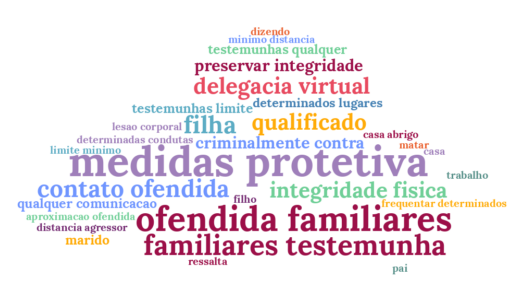

In [15]:
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette= ['#9c0f48','#6FCF97','#722770','#ea5f2d','#6f95ff','#ffab07','#9F7FBA','#548e87', '#5cacc4','#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=60, 
                      width=750, 
                      height=500,
                      max_font_size=80, min_font_size=20,
                      background_color='#FFFFFF', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

svg_data = wordcloud.to_svg()
with open("C:\\Users\\carlo\\Downloads\\nuvem_palavras.svg", "w") as f:
    f.write(svg_data)
    
#with open("mineração_texto/nuvem_palavras_relatos.svg", "w") as f:
    #f.write(wordcloud.to_svg())

In [14]:
translation_dict = {
    "dizendo": "saying",
    "minimo": "minimum",
    "distancia": "distance",
    "testemunhas": "witnesses",
    "qualquer": "any",
    "preservar": "preserve",
    "integridade": "integrity",
    "delegacia": "delegacy",
    "determinados": "specific",
    "lugares": "places",
    "testemunhas": "witnesses",
    "limite": "limit",
    "qualificado": "qualified",
    "filho": "son",
    "filha": "daughter",
    "lesão": "harm",
    "lesao": "harm",
    "corporal": "bodily",
    "determinadas": "certain",
    "condutas": "conducts",
    "casa": "house",
    "abrigo": "shelter",
    "matar": "kill",
    "casa": "house",
    "trabalho": "work",
    "frequentar": "attend",
    "determinados": "specific",
    "integridade": "integrity",
    "fisica": "physical",
    "protetivas": "protective",
    "medidas": "measures",
    "contato": "contact",
    "ofendida": "offended",
    "aprocimacao": "approach",
    "familiares": "family members",
    "ressalta": "Emphasizes",
    "agressor": "aggressor",
    "marido": "husband",
    "comunicacao": "communication",
    "criminalmente": "criminally",
    "contra": "against",
    "qualificado": "qualified",
    "pai": "father",
    "aproximacao": "approximation",
    "medidas protetiva": "protective measures",
    "contato ofendida": "contact with the offended",
    "aproximacao ofendida": "approach of the offended",
    "distancia agressor": "distance from the aggressor",
    "qualquer comunicacao": "any communication",
    "preservar integridade": "preserve integrity",
    "lesao corporal": "bodily injury",
    "delegacia virtual": "virtual police station",
    "casa abrigo": "shelter house",
    "integridade física": "physical integrity",
    "frequentar determinados": "attend specific",
    "testemunhas qualquer": "any witnesses",
    "limite minimo": "minimum limit",
    "determinadas condutas": "specific conducts",
    "criminalmente contra": "criminally against"
    
}

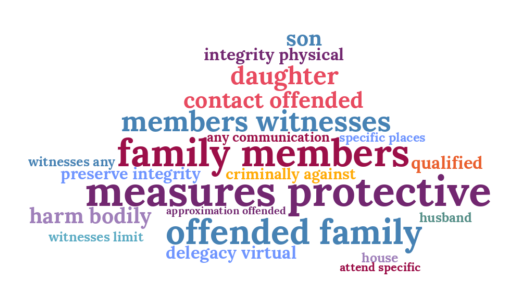

In [62]:
# Função de cores personalizadas
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    custom_palette = ['#9c0f48', '#6FCF97', '#722770', '#ea5f2d', '#6f95ff', '#ffab07', '#9F7FBA', '#548e87', '#5cacc4', '#e84a5f', '#4682B4']
    return np.random.choice(custom_palette)

text_filtered = " ".join(translation_dict.get(word, word) for word in text_filtered.split())

mascara = np.array(Image.open('C:\\Users\\carlo\\Downloads\\nuvem1.jpg'))

wordcloud = WordCloud(stopwords=stop_words, 
                      max_words=75, 
                      width=700, 
                      height=500,
                      max_font_size=80, 
                      min_font_size=20,
                      background_color='#FFFFFF', 
                      mask=mascara,
                      prefer_horizontal=1.0,
                      font_path="C:\\Users\\carlo\\Downloads\\lora\\Lora-Bold.ttf",
                      color_func=custom_color_func).generate(text_filtered)

# Mostrar a nuvem de palavras
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Salvar como SVG
svg_data = wordcloud.to_svg()
with open("C:\\Users\\carlo\\Downloads\\nuvem_ingles1.svg", "w") as f:
    f.write(svg_data)


* Processo de vetorização

In [11]:
tf_vectorizer = CountVectorizer(
    min_df=5,           # Considera palavras que aparecem em pelo menos 5 documentos
    max_df=0.5,          # Exclui termos que aparecem em mais de 50% dos documentos
    max_features=50000,  # Limita o número de termos no vocabulário aos 50.000 mais frequentes
    stop_words=stop_words, # Remove palavras comuns que não são úteis
    ngram_range=(1, 2)   # Considera uni-gramas (termos únicos) e bi-gramas (pares de termos)
)

#Transformação
vec_text = tf_vectorizer.fit_transform(relatos_limpos)

#Retorna a lista de palavras
words = tf_vectorizer.get_feature_names_out()

print(vec_text.shape)
print(len(words))

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anexadas', 'assinado', 'contatos', 'crime', 'delegacia', 'dia', 'elencadas', 'informacoes', 'mae', 'ocorreu', 'olho', 'pegar', 'proibicao', 'proibição', 'serao', 'som', 'vidro', 'volume'] not in stop_words.
  warnings.warn(


(47607, 50000)
50000


In [12]:
words[0:20]

array(['abala', 'abalada', 'abalada emocionalmente', 'abalada medo',
       'abalada psicologicamente', 'abalada situacao', 'abalada teme',
       'abalado', 'abalado psicologico', 'abalados', 'abalando', 'abalar',
       'abalo', 'abalo emocional', 'abalo psicologico', 'abalos',
       'abalos psicológicos', 'abalou', 'abandona', 'abandonada'],
      dtype=object)

### Implementação do LDA

#### Encontrar os tópicos

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
def print_top_words(model, feature_names, n_top_words):
  #Essa função imprime as palavras mais importantes para cada tópico descoberto pelo modelo LDA.
  for topic_idx, topic in enumerate(model.components_):
    print("\n--\nTopic #{}: ".format(topic_idx + 1))
    message = ", ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

def display_topics(W, H, feature_names, relatos, no_top_words, no_top_documents):
    #Essa função exibe os tópicos e os documentos mais representativos para cada tópico.
    for topic_idx, topic in enumerate(H):
        print("\n--\nTopic #{}: ".format(topic_idx + 1))
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx:
            print('Relato índice {} : \t{:.2f}'.format(d, W[d, topic_idx]))

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca scikit-learn para realizar modelagem de tópicos no conjunto de relatos representados por vetores de contagem de palavras.

In [15]:
lda = LatentDirichletAllocation(n_components=20, 
                                learning_method='batch', # 'online' equivale a minibatch no k-means
                                random_state=0)

t0 = time()

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text) #Converte os documentos representados pelos vetores vec_text em distribuições de tópicos, onde cada linha da matriz resultante (doc_topic_matrix) representa um documento e cada coluna representa a probabilidade do documento pertencer a um determinado tópico.

print("done in %0.3fs." % (time() - t0))

done in 845.967s.


* Palavras mais associadas com cada tópico

In [16]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


Topics in LDA model:

--
Topic #1: 
ameaça, vítima, através, delegacia, vítima ameaça, delegacia dia, dia vítima, através delegacia, dizendo, trabalho

--
Topic #2: 
ex, companheiro, filho, proibição, agressor, ofendida, proibição agressor, ameaçada, ex companheiro, aceita

--
Topic #3: 
filho, filha, relacionamento, telefone, residencia, citado, crianca, sempre, psicologica, ofendida

--
Topic #4: 
companheiro, sr, medidas, pa, protetivas, medidas protetivas, especializada, ex, possui, casal

--
Topic #5: 
pedreira, afirma, residente, seguintes, direito, tv, registra direito, anderson, reside, pegar

--
Topic #6: 
pa, filho, relacionamento, raimundo, natural, brasileiro, nascido, marido, pc, pc pa

--
Topic #7: 
agressor, ofendida, contato, companheiro, proibicao, medidas, protetivas, medidas protetivas, proibicao agressor, casal

--
Topic #8: 
ofendida, proibição, contato, agressor, ofendida testemunhas, testemunhas, meio, fixando, fixando limite, limite

--
Topic #9: 
agredida, fis

- Probabilidade de cada topico

In [17]:
topic_probabilities = doc_topic_matrix.mean(axis=0)
topic_percentages = topic_probabilities * 100

for topic_idx, percentage in enumerate(topic_percentages):
    print(f"Tópico {topic_idx + 1}: {percentage:.2f}%")


Tópico 1: 5.75%
Tópico 2: 3.00%
Tópico 3: 2.17%
Tópico 4: 4.24%
Tópico 5: 3.97%
Tópico 6: 2.86%
Tópico 7: 3.38%
Tópico 8: 2.68%
Tópico 9: 12.15%
Tópico 10: 5.40%
Tópico 11: 7.55%
Tópico 12: 8.11%
Tópico 13: 4.64%
Tópico 14: 8.47%
Tópico 15: 6.76%
Tópico 16: 2.91%
Tópico 17: 5.46%
Tópico 18: 2.66%
Tópico 19: 3.70%
Tópico 20: 4.12%


In [18]:
n_topics = lda.components_.shape[0]

dominant_topic_per_doc = np.argmax(doc_topic_matrix, axis=1)

topic_distribution = np.mean(doc_topic_matrix, axis=0)

for i, prob in enumerate(topic_distribution):
    print(f"Tópico {i + 1}: Probabilidade média = {prob:.3f} ({prob*100:.2f}%)")


Tópico 1: Probabilidade média = 0.057 (5.75%)
Tópico 2: Probabilidade média = 0.030 (3.00%)
Tópico 3: Probabilidade média = 0.022 (2.17%)
Tópico 4: Probabilidade média = 0.042 (4.24%)
Tópico 5: Probabilidade média = 0.040 (3.97%)
Tópico 6: Probabilidade média = 0.029 (2.86%)
Tópico 7: Probabilidade média = 0.034 (3.38%)
Tópico 8: Probabilidade média = 0.027 (2.68%)
Tópico 9: Probabilidade média = 0.121 (12.15%)
Tópico 10: Probabilidade média = 0.054 (5.40%)
Tópico 11: Probabilidade média = 0.075 (7.55%)
Tópico 12: Probabilidade média = 0.081 (8.11%)
Tópico 13: Probabilidade média = 0.046 (4.64%)
Tópico 14: Probabilidade média = 0.085 (8.47%)
Tópico 15: Probabilidade média = 0.068 (6.76%)
Tópico 16: Probabilidade média = 0.029 (2.91%)
Tópico 17: Probabilidade média = 0.055 (5.46%)
Tópico 18: Probabilidade média = 0.027 (2.66%)
Tópico 19: Probabilidade média = 0.037 (3.70%)
Tópico 20: Probabilidade média = 0.041 (4.12%)


* Documentos mais associados a cada topico

In [19]:
display_topics(doc_topic_matrix, lda.components_, tf_feature_names, relatos, 10, 10)


--
Topic #1: 
AMEAÇA, VÍTIMA, ATRAVÉS, DELEGACIA, VÍTIMA AMEAÇA, DELEGACIA DIA, DIA VÍTIMA, ATRAVÉS DELEGACIA, DIZENDO, TRABALHO
Relato índice 11135 : 	0.99
Relato índice 15159 : 	0.99
Relato índice 15118 : 	0.99
Relato índice 10820 : 	0.99
Relato índice 11422 : 	0.99
Relato índice 13155 : 	0.99
Relato índice 17733 : 	0.99
Relato índice 15135 : 	0.99
Relato índice 15192 : 	0.99
Relato índice 16036 : 	0.99

--
Topic #2: 
EX, COMPANHEIRO, FILHO, PROIBIÇÃO, AGRESSOR, OFENDIDA, PROIBIÇÃO AGRESSOR, AMEAÇADA, EX COMPANHEIRO, ACEITA
Relato índice 9434 : 	1.00
Relato índice 14585 : 	1.00
Relato índice 4075 : 	1.00
Relato índice 5063 : 	1.00
Relato índice 2129 : 	1.00
Relato índice 12584 : 	1.00
Relato índice 335 : 	1.00
Relato índice 11588 : 	1.00
Relato índice 2344 : 	1.00
Relato índice 11714 : 	1.00

--
Topic #3: 
FILHO, FILHA, RELACIONAMENTO, TELEFONE, RESIDENCIA, CITADO, CRIANCA, SEMPRE, PSICOLOGICA, OFENDIDA
Relato índice 38211 : 	1.00
Relato índice 45058 : 	1.00
Relato índice 42574 : 	0

In [20]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(47607, 20)
Matriz tópicos-termos:(20, 50000)


* Atribuir um tópico principal a cada documento com base nas distribuições de tópicos obtidas do modelo LDA.

In [21]:
main_topic = []
mt_prob = []
for l in range(len(relatos['relato'])):
  main_topic.append(doc_topic_matrix[l, :].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l, :].max())

relatos = relatos.assign(main_topic=main_topic, main_topic_prob=mt_prob)


In [22]:
topico = 1
pd.options.display.max_colwidth = 300
relatos[relatos['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','relato']].head(20).sample(10)

,main_topic_prob,relato
17733,0.988690,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: DESDE MÊS 11DE 2019 VENHO COBRANDO A MOÇA CHAMADA ALCIDEIA NEVES A QUAL EU FAZIA VENDAS DOMICILIARES INCLUSIVE NÃO APENAS A ELAMESMA SEMPRE PR..."
10050,0.985606,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: ESSA PESSOA CHEGOU NAS MINHAS MENSAGENS PRIVADAS DA REDE SOCIAL INSTAGRAM AFIRMANDO QUE FINALMENTE HAVIA ME ENCONTRADO, E AMEAÇANDO QUE TINHA ..."
15159,0.990000,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: SOU GERENTE DA LOJA OI E FAÇO PARTE DE VÁRIOS GRUPOS DE VENDAS DO WHATSAPP, TEM UM RAPAZ QUE VENDE UM PLANO DA OI DE FORMA INDEVIDA (FRAUDE) M..."
11422,0.989560,"A relatora acima compareceu nesta delegacia para registrar que trabalhou por 03 semanas na empresa de THIAGO DA SILVA DOS SANTOS, localizada na TRAVESSA SÃO ROQUE N° 108 CRUZEIRO ICOARACI BELÉM PARA. Que, na primeira semana THIAGO foi logo falando que ela era bonita e falava as textuais: “ TU AI..."
10820,0.989560,"A relatora acima compareceu nesta delegacia para registrar que trabalhou por 03 semanas na empresa de THIAGO DA SILVA DOS SANTOS, localizada na TRAVESSA SÃO ROQUE N° 108 CRUZEIRO ICOARACI BELÉM PARA. Que, na primeira semana THIAGO foi logo falando que ela era bonita e falava as textuais: “ TU AI..."
11121,0.986429,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: NA NOITE DO DIA 07/10/2020 AS 21:36 A SENHORA JOSY CARNEVALE ME ENVIOU MENSAGENS ME ACUSANDO DE TER UM CASO COM SEU ESPOSO IGOR, MENSAGENS NA..."
13148,0.985156,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: NA TARDE DE DIA 22/12/2020 ACEITEI UMA PERMUTA COM UM SENHORA CHAMADA BETE ELA VEIO FEZ OS PROCEDIMENTOS NO CABELO PERGUNTEI COMO QUERIA FUI F..."
14070,0.984167,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: AO DIA 16/07/2020, A SENHORA FERNANDA VIANNA CRUZ, MORADORA DO CONDOMÍNIO PORTO ESMERALDA, SITUADO NA MÁRIO COVAS, ENVIOU MENSAGENS PARA O MEU..."
14191,0.986429,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: BOA NOITE, CHAMO-ME, ROSSANE REBECCA, ESTOU HOSPEDADA NO HOTEL GO IN- BELÉM À 48 DIAS, CHEGANDO DIA 15-06, COM À RESERVA PAGA PARA 15 DIAS(..."
15118,0.989674,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS DA DELEGACIA VIRTUAL, QUE NO DIA E HORA ACIMA MENCIONADOS FOI VÍTIMA DE AMEAÇA, CONFORME O SEGUINTE RELATO: COMUNICO QUE NO DIA, HORÁRIO E LOCAL, FUI ALVO DE AMEAÇA DE MINHA VIZINHA CONHECIDA COMO ANA QUE MORA NA PARTE DA FRENTE DE MEU ENDEREÇO, POR ..."


* Tópicos por documento

In [23]:
# Nomes das colunas dos tópicos
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

# Criar DataFrame relato_topico
relato_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index=relatos.index)

# Adicionar o índice do relato ao DataFrame relato_topico
relato_topico['Relato_Index'] = relatos.index

# Reorganizar as colunas
ordem = ['Relato_Index']
ordem.extend(topicnames)
relato_topico = relato_topico[ordem]

# Visualizar o DataFrame relato_topico
relato_topico.head()



,Relato_Index,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0,0.15,0.00,0.0,0.00,0.06,0.00,0.0,0.00,0.23,...,0.20,0.34,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00
1,1,0.00,0.00,0.0,0.00,0.11,0.00,0.0,0.00,0.40,...,0.44,0.00,0.05,0.0,0.0,0.00,0.00,0.0,0.0,0.00
2,2,0.00,0.00,0.0,0.05,0.13,0.00,0.0,0.66,0.04,...,0.07,0.00,0.05,0.0,0.0,0.00,0.00,0.0,0.0,0.00
3,3,0.00,0.00,0.0,0.00,0.00,0.06,0.0,0.00,0.00,...,0.00,0.00,0.22,0.0,0.0,0.47,0.00,0.0,0.0,0.00
4,4,0.21,0.15,0.0,0.13,0.00,0.06,0.0,0.05,0.00,...,0.21,0.00,0.00,0.0,0.0,0.00,0.03,0.0,0.0,0.07


- #### Visualização modelo LDA

In [24]:
import pyLDAvis
from pyLDAvis import lda_model

pyLDAvis.enable_notebook()

* Função prepare para preparar os dados para visualização de tópicos utilizando o modelo LDA.

In [25]:
fig_width = 600
fig_height = 400

lda_vis = pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds='tsne', R=10)

pyLDAvis.save_html(lda_vis, 'lda_vis.html')
pyLDAvis.display(lda_vis)

plt.figure(figsize=(fig_width, fig_height))

<Figure size 60000x40000 with 0 Axes>

<Figure size 60000x40000 with 0 Axes>

In [26]:
pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne', R=10)

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
0     -115.041473  -55.267746       1        1  7.383241
1       -8.009520  120.236061       2        1  2.614282
2       43.394627  -35.416523       3        1  8.447410
3       -0.747758   52.593895       4        1  6.257103
4      -68.481369  -93.771858       5        1  5.711304
5       -4.051214  -63.722759       6        1  3.004492
6       94.898102  -66.815613       7        1  3.419780
7      -16.212639 -122.497299       8        1  3.520699
8       94.049789   55.665646       9        1  1.832886
9     -142.898254    9.508598      10        1  4.960052
10      42.709648 -100.862770      11        1  5.965569
11      42.795292   20.744043      12        1  2.399672
12      -4.077721   -7.350091      13        1  9.052303
13    -104.304443   62.480442      14        1  5.296256
14     -52.712337   83.159912      15        1  6.430212
15      44.238548   88.420219      16        1  5.017119
16     -44.775719   25.328924      17        1  5.183092
17     -49.435787  -38.224110      18        1  4.341362
18      98.007164   -5.125580      19        1  6.810216
19     -87.351051   -1.089746      20        1  2.352952, topic_info=              Term          Freq         Total Category  logprob  loglift
32779     ofendida  25333.000000  25333.000000  Default  10.0000  10.0000
20412        filha  21376.000000  21376.000000  Default   9.0000   9.0000
37190    proibicao  13825.000000  13825.000000  Default   8.0000   8.0000
3812          anos  37875.000000  37875.000000  Default   7.0000   7.0000
1708      agressor  14715.000000  14715.000000  Default   6.0000   6.0000
...            ...           ...           ...      ...      ...      ...
49114       vitima   1446.502965  23382.359172  Topic20  -4.5641   0.9667
30905   nascimento    923.248296   6829.615900  Topic20  -5.0131   1.7484
24466  informacoes    672.167310   2964.359537  Topic20  -5.3305   2.2656
31797         nome    900.980953  13335.638304  Topic20  -5.0375   1.0548
2810        ameaca    815.908244  12806.947554  Topic20  -5.1367   0.9961

[640 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
107        4  0.022446  abrigamento temporario
107       12  0.972643  abrigamento temporario
110        1  0.000194                  abrigo
110        4  0.091498                  abrigo
110        5  0.112025                  abrigo
...      ...       ...                     ...
49689     10  0.997689           vítima refere
49835      2  0.993499                     www
49957     13  0.027297                   áudio
49957     16  0.027297                   áudio
49957     17  0.939788                   áudio

[3512 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

#### Implementação PCA
- Reduzir a dimensionalidade do espaço de vetores

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans


In [27]:
pca = PCA()
X = pca.fit_transform(doc_topic_matrix)

In [30]:
pca.explained_variance_ratio_

array([1.20890037e-01, 1.07818208e-01, 8.81550808e-02, 7.79633696e-02,
       7.30222484e-02, 6.65201289e-02, 5.55699424e-02, 5.44886135e-02,
       4.68282309e-02, 4.21535003e-02, 4.14201818e-02, 4.01437503e-02,
       3.80273333e-02, 3.20030297e-02, 3.06973493e-02, 2.93151330e-02,
       2.41140921e-02, 1.63018122e-02, 1.45679591e-02, 8.52974759e-16])

Número de componentes para 95% da variância: 17


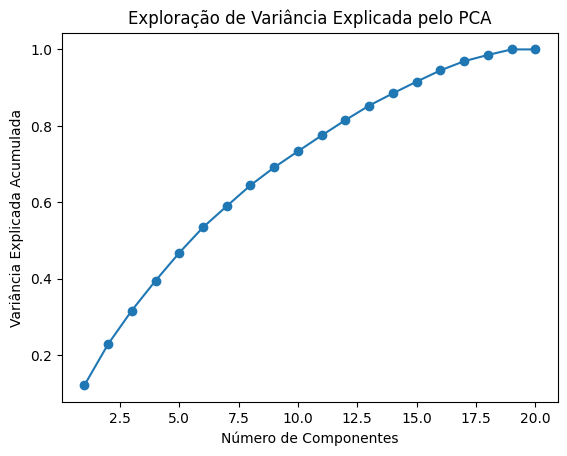

In [31]:
explained_variance_ratio = np.array([1.20890037e-01, 1.07818208e-01, 8.81550808e-02, 7.79633696e-02,
       7.30222484e-02, 6.65201289e-02, 5.55699424e-02, 5.44886135e-02,
       4.68282309e-02, 4.21535003e-02, 4.14201818e-02, 4.01437503e-02,
       3.80273333e-02, 3.20030297e-02, 3.06973493e-02, 2.93151330e-02,
       2.41140921e-02, 1.63018122e-02, 1.45679591e-02, 8.52974759e-16])

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes para 95% da variância: {n_components}")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Exploração de Variância Explicada pelo PCA')
plt.show()


Número de componentes para 95% da variância: 17


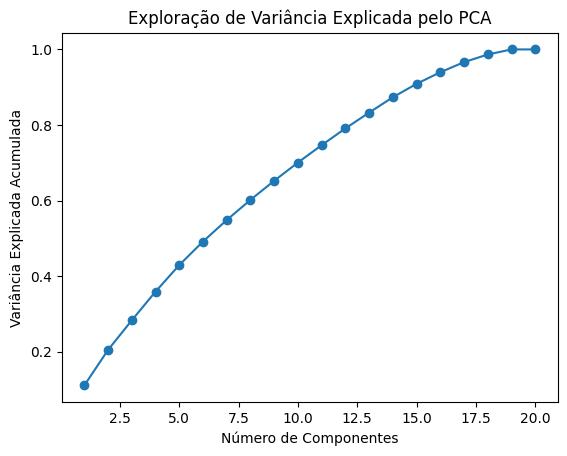

In [33]:
explained_variance_ratio = np.array([0.11050222, 0.09405302, 0.07826315, 0.0759982,
                                     0.07028684, 0.06231417, 0.05686401, 0.05343194,
                                     0.05043705, 0.04841952, 0.04586966, 0.04438015,
                                     0.04192076, 0.0406116, 0.03559539, 0.03058861,
                                     0.02678623, 0.02023744, 0.01344005, 0.0])

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes para 95% da variância: {n_components}")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Exploração de Variância Explicada pelo PCA')
plt.show()


In [32]:
components = np.arange(1, len(cumulative_variance) + 1)

df = pd.DataFrame({'Components': components,
'Cumulative Explained Variance': cumulative_variance,
'Explained Variance': explained_variance_ratio})

chart = alt.Chart(df).mark_circle(opacity=0.7,size=100).encode(
    x=alt.X('Components:Q', title='Components'),
    y=alt.Y('Cumulative Explained Variance:Q', title='Cumulative Variance (%)'),
    size=alt.Size('Explained Variance:Q', title='Variance/Component (%)'),
    tooltip=[
        alt.Tooltip('Components:Q', title='Components'),
        alt.Tooltip('Cumulative Explained Variance:Q', format='.2%', title='Cumulative'),
        alt.Tooltip('Explained Variance:Q', format='.2%', title='Per Component')
    ],
    color=alt.Color('Components:O', scale=alt.Scale(range=custom_palette), title='Components')
).interactive()

line = alt.Chart(pd.DataFrame({'x': [n_components]})).mark_rule(
    color='red',
    strokeDash=[5, 5],
    size=2
).encode(
    x='x:Q',tooltip=[alt.Tooltip('x:Q', title='Ideal Components')])

final_chart = (chart + line).properties(
    width=600,height=400,
    title='Exploring PCA Explained Variance')

final_chart

alt.LayerChart(...)

In [34]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(doc_topic_matrix)

- metodo elbow

In [34]:
from sklearn.cluster import MiniBatchKMeans

In [35]:
sse = []  

for k in range(1, 21):  # Teste de 1 a 20 clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_) 

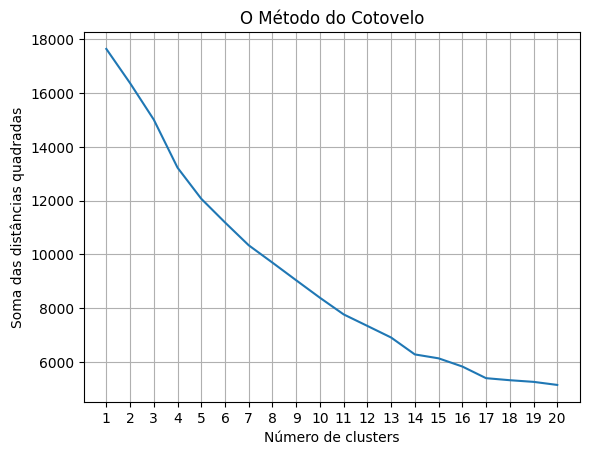

In [36]:
plt.plot(range(1, 21), sse)
plt.title('O Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Soma das distâncias quadradas')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [37]:
from yellowbrick.cluster import KElbowVisualizer

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


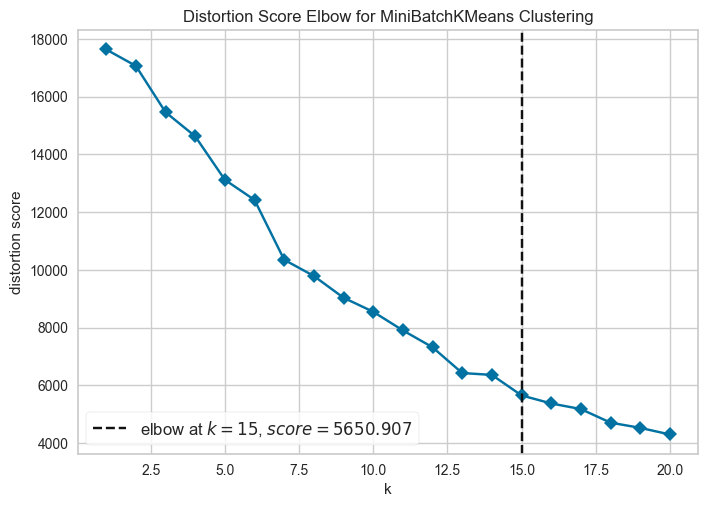

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(1,21), timings = False)
visualizer.fit(reduced_data)
visualizer.show()

In [71]:
lines = visualizer.ax.get_lines()  
lines[0].set_color("#e84a5f")
visualizer.finalize()
visualizer.ax.figure.savefig("mineração_texto/elbow_method.svg", format="svg")

Avaliação da Qualidade de Clusters com Silhouette Score

In [41]:
from sklearn.metrics import silhouette_score

for k in range(2, 21):  # A pontuação da silhueta começa em 2 clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    
    score = silhouette_score(reduced_data, kmeans.labels_)
    
    print("Para o cluster: {}, a pontuação da silhueta é: {:.3f}".format(k, score))


Para o cluster: 2, a pontuação da silhueta é: 0.081
Para o cluster: 3, a pontuação da silhueta é: 0.085
Para o cluster: 4, a pontuação da silhueta é: 0.143
Para o cluster: 5, a pontuação da silhueta é: 0.176
Para o cluster: 6, a pontuação da silhueta é: 0.197
Para o cluster: 7, a pontuação da silhueta é: 0.224
Para o cluster: 8, a pontuação da silhueta é: 0.240
Para o cluster: 9, a pontuação da silhueta é: 0.256
Para o cluster: 10, a pontuação da silhueta é: 0.272
Para o cluster: 11, a pontuação da silhueta é: 0.287
Para o cluster: 12, a pontuação da silhueta é: 0.290
Para o cluster: 13, a pontuação da silhueta é: 0.303
Para o cluster: 14, a pontuação da silhueta é: 0.318
Para o cluster: 15, a pontuação da silhueta é: 0.293
Para o cluster: 16, a pontuação da silhueta é: 0.299
Para o cluster: 17, a pontuação da silhueta é: 0.312
Para o cluster: 18, a pontuação da silhueta é: 0.298
Para o cluster: 19, a pontuação da silhueta é: 0.291
Para o cluster: 20, a pontuação da silhueta é: 0.268


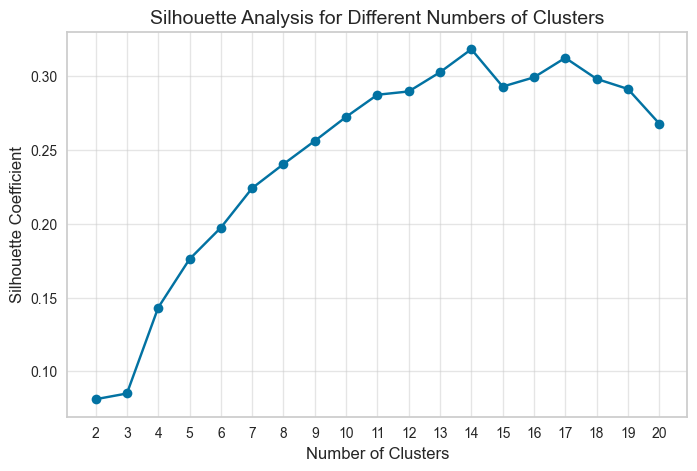

In [42]:
silhouette_coefficients = []
# Avaliação da Pontuação da Silhueta para diferentes números de clusters
for k in range(2, 21):  # A pontuação da silhueta começa em 2 clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    
    # Calcula a Pontuação da Silhueta
    score = silhouette_score(reduced_data, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plotando os coeficientes de silhueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_coefficients, marker='o', linestyle='-', color='b')
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.title("Silhouette Analysis for Different Numbers of Clusters", fontsize=14)
plt.grid(alpha=0.5)
plt.show()


* Transformando os dados para um espaço bidimensional, que pode ser utilizado para visualizações adicionais.

In [28]:
from sklearn.manifold import TSNE

relatos_embedded = TSNE(n_components=2, verbose=1, perplexity=40, early_exaggeration=20).fit_transform(doc_topic_matrix)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 47607 samples in 0.016s...
[t-SNE] Computed neighbors for 47607 samples in 47.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47607
[t-SNE] Computed conditional probabilities for sample 2000 / 47607
[t-SNE] Computed conditional probabilities for sample 3000 / 47607
[t-SNE] Computed conditional probabilities for sample 4000 / 47607
[t-SNE] Computed conditional probabilities for sample 5000 / 47607
[t-SNE] Computed conditional probabilities for sample 6000 / 47607
[t-SNE] Computed conditional probabilities for sample 7000 / 47607
[t-SNE] Computed conditional probabilities for sample 8000 / 47607
[t-SNE] Computed conditional probabilities for sample 9000 / 47607
[t-SNE] Computed conditional probabilities for sample 10000 / 47607
[t-SNE] Computed conditional probabilities for sample 11000 / 47607
[t-SNE] Computed conditional probabilities for sample 12000 / 47607
[t-SNE] Computed conditional probabilities for s

In [41]:
import altair as alt

relatos = relatos.assign(tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos.sample(500)).mark_circle(
    opacity = .7,
    size = 30
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('main_topic:N', title='Topic'),
    size=alt.Size('main_topic_prob', title='Probability of topic'),
    tooltip = ['relato', 'main_topic', 'main_topic_prob']
).interactive().properties(
    width=width,
    height=height
)


alt.Chart(...)

 Utilização do algoritmo MiniBatchKMeans para realizar clustering nos dados de tópicos obtidos a partir da matriz dos relatos transformados.

* Agrupamento de acordo com os topicos

In [35]:
kmeans = MiniBatchKMeans(n_clusters=15,init_size=1024, batch_size=2048, random_state=42)
#fit the data 
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

In [45]:
relatos1 = relato_topico.assign(grupo = labels, 
                              tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 700
height = 500
alt.Chart(relatos1.sample(500)).mark_circle(
    opacity = .7,
    size = 50
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('grupo:N', title='Group', scale=alt.Scale(domain=ordered_groups, range=custom_palette)),
    tooltip = [str(c) for c in relatos1.columns]
).interactive().properties(
    width=width,
    height=height
)



alt.Chart(...)